In [34]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB  # Gaussian naive Bayes classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from IPython.display import display
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("iris/"))

# Any results you write to the current directory are saved as output.

['Iris.csv', 'iris.py', 'iris_basic.py']


In [35]:
#reading the iris dataset 
iris = pd.read_csv('iris/Iris.csv')
print(iris.shape)
iris=iris.drop('Id',axis=1)
display(iris.head())

(150, 6)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# 1.Data Exploration
First we will explore the data by plotting graphs ,check if there is any missing values,co-relation between features and all these things
Below you can find 
* The describition about the data set
* The correlation graph between the features from the iris data set

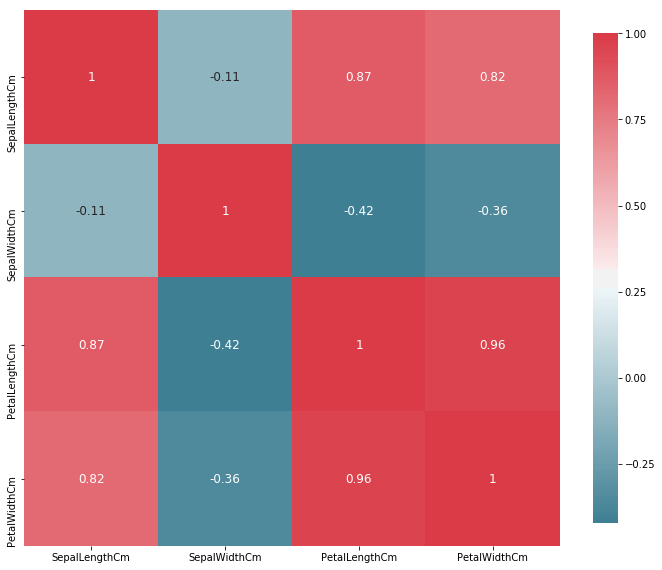

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [36]:
#plotting the confusion matrix 
def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
       
    )
plot_correlation_map(iris)
plt.show()
iris.describe()

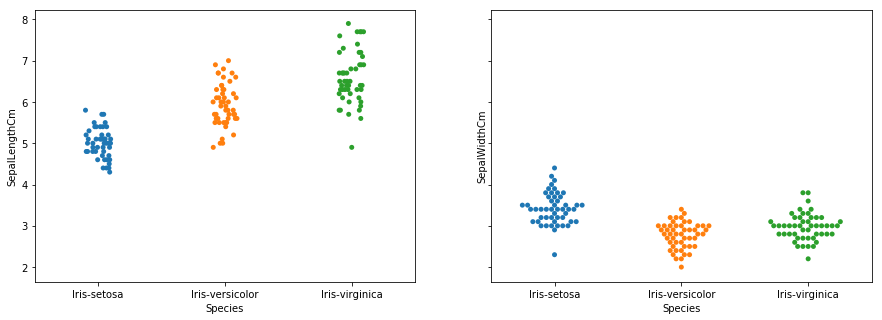

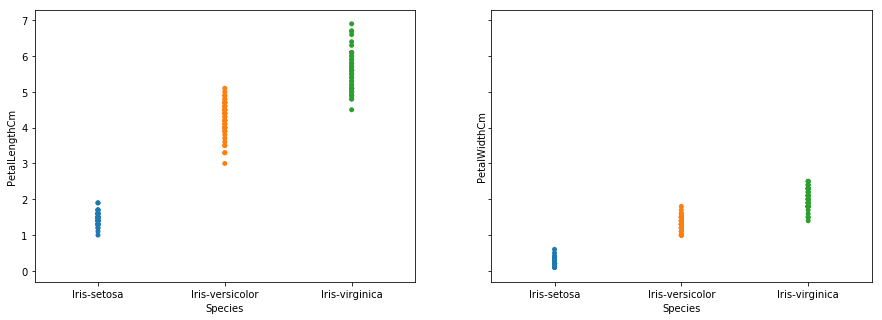

In [37]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=(15,5))
sns.stripplot(x="Species", y="SepalLengthCm", data=iris,ax=ax1, jitter=True);
sns.swarmplot(x="Species", y="SepalWidthCm", data=iris,ax=ax2);
fig, (ax3, ax4) = plt.subplots(ncols=2, sharey=True,figsize=(15,5))
sns.stripplot(x="Species", y="PetalLengthCm", data=iris,ax=ax3);
sns.stripplot(x="Species", y="PetalWidthCm", data=iris,ax=ax4);
plt.show()

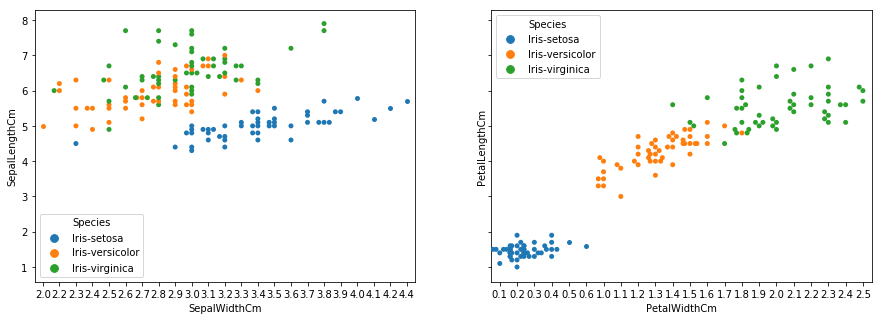

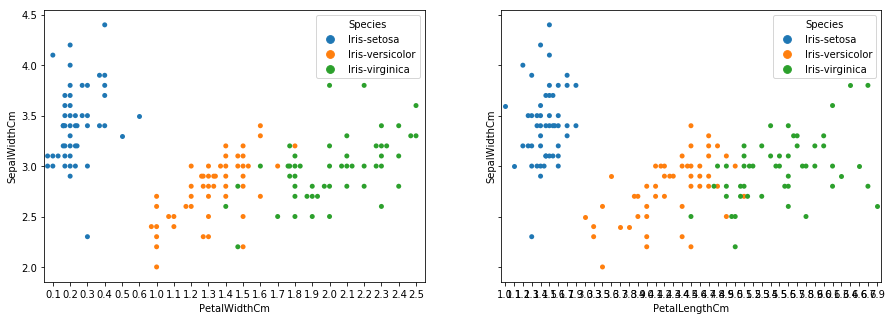

In [38]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True,figsize=(15,5))
sns.swarmplot(x="SepalWidthCm", y="SepalLengthCm", hue="Species", data=iris,ax=ax1);
sns.swarmplot(x="PetalWidthCm", y="PetalLengthCm", hue="Species", data=iris,ax=ax2);
fig, (ax3, ax4) = plt.subplots(ncols=2, sharey=True,figsize=(15,5))
sns.swarmplot(x="PetalWidthCm", y="SepalWidthCm", hue="Species", data=iris,ax=ax3);
sns.swarmplot(x="PetalLengthCm", y="SepalWidthCm", hue="Species", data=iris,ax=ax4);
plt.show()

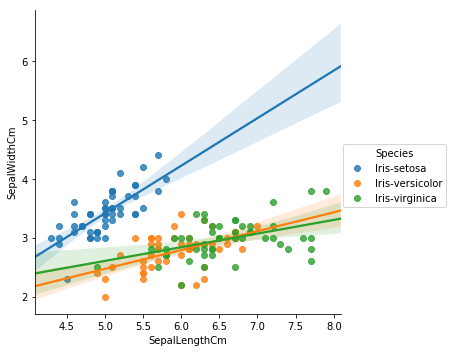

In [39]:
sns.lmplot(x="SepalLengthCm", y="SepalWidthCm", hue="Species", data=iris);
plt.show()

# Splitting Train,Test Data

We are following supervised learning so we are splitting the dataset into Transet and Testset

Trainset to Train the model 
Testset to test the model and finding the accuracy of the model with the predicted values

In [42]:
#iris=iris.drop('SepalWidthCm',axis=1)
trainSet, testSet = train_test_split(iris, test_size = 0.33)
print(trainSet.shape)
print(testSet.shape)

(100, 4)
(50, 4)


In [45]:
# Format the data and expected values for SKLearn
trainData = pd.DataFrame(trainSet[['SepalLengthCm', 'PetalLengthCm', 'PetalWidthCm']]).values
trainTarget = pd.DataFrame(trainSet[['Species']]).values.ravel()
testData = pd.DataFrame(testSet[['SepalLengthCm', 'PetalLengthCm', 'PetalWidthCm']]).values
testTarget = pd.DataFrame(testSet[['Species']]).values.ravel()


The accuracy of the model is 0.94
The confusion matrix of the model is 
    0   1   2
0  16   0   0
1   0  15   1
2   0   2  16


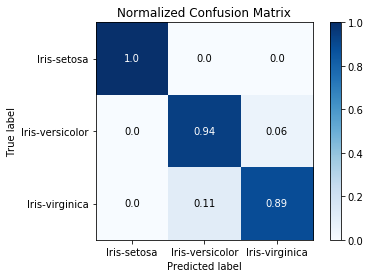

In [47]:
#using Niave Bayes algorithm
classifier = GaussianNB()
classifier.fit(trainData, trainTarget)
predicted_value = classifier.predict(testData)

predictions = dict()
accuracy = accuracy_score(testTarget,predicted_value) 
predictions['Naive-Bayes']=accuracy*100
print("The accuracy of the model is {}".format(accuracy))
confusionmatrix = confusion_matrix(testTarget, predicted_value)
cm=pd.DataFrame(confusion_matrix(testTarget, predicted_value))
print("The confusion matrix of the model is \n{}".format(cm))
skplt.metrics.plot_confusion_matrix(testTarget, predicted_value, normalize=True)
plt.show()

In [49]:
#Using Random forest
clf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
clf.fit(trainData, trainTarget)
predicted_value = clf.predict(testData)
accur = accuracy_score(testTarget,predicted_value) 
predictions['Random-Forest']=accur*100
cm = (confusion_matrix(testTarget, predicted_value))
print("The accuracy score of the model is {}".format(accur))
print("The confusion matrix of the model is \n{}".format(cm))

The accuracy score of the model is 0.94
The confusion matrix of the model is 
[[16  0  0]
 [ 0 15  1]
 [ 0  2 16]]


In [51]:
#using decision Tree
clf1=DecisionTreeClassifier()
clf1.fit(trainData, trainTarget)
predicted_value = clf1.predict(testData)
accur = accuracy_score(testTarget,predicted_value) 
predictions['Decision Tree']=accur*100
cm = (confusion_matrix(testTarget, predicted_value))
print("The accuracy score of the model is {}".format(accur))
print("The confusion matrix of the model is \n{}".format(cm))

The accuracy score of the model is 0.94
The confusion matrix of the model is 
[[16  0  0]
 [ 0 15  1]
 [ 0  2 16]]


In [53]:
#using KNN algorithm
clf2=KNeighborsClassifier()
clf2.fit(trainData, trainTarget)
predicted_value = clf2.predict(testData)
accur = accuracy_score(testTarget,predicted_value)
predictions['KNN']=accur*100
cm = (confusion_matrix(testTarget, predicted_value))
print("The accuracy score of the model is {}".format(accur))
print("The confusion matrix of the model is \n{}".format(cm))

The accuracy score of the model is 0.94
The confusion matrix of the model is 
[[16  0  0]
 [ 0 15  1]
 [ 0  2 16]]


,Algorithms,Percentage
0,Naive-Bayes,94.0
1,Random-Forest,94.0
2,Decision Tree,94.0
3,KNN,94.0


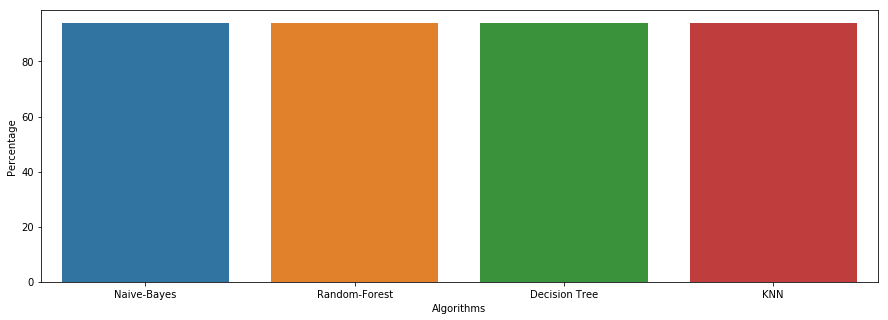

In [55]:
fig, (ax1) = plt.subplots(ncols=1, sharey=True,figsize=(15,5))
df=pd.DataFrame(list(predictions.items()),columns=['Algorithms','Percentage'])
display(df)
sns.barplot(x="Algorithms", y="Percentage", data=df,ax=ax1);
plt.show()

In [56]:
#submission file 
submission= pd.DataFrame()
columns=['SepalLengthCm', 'PetalLengthCm', 'PetalWidthCm']
submission[columns] = testSet[columns]
submission['Species']=predicted_value
submission.to_csv('Submission.csv',index=True)
print("Submission file Created")

Submission file Created
